単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

In [1]:
import pandas as pd
import re
#import matplotlib

In [2]:
count_sentence = 1
neko_df = pd.DataFrame(index=[], columns=['sentence','surface','base','pos','pos1'])

with open('./neko.txt.mecab', encoding='utf-8') as neko_base:
    for i, neko_line in enumerate(neko_base):
        neko_word = re.split(',|\t', neko_line)

#記号があると名詞連接に記号をはさんでいるかがわかりにくいのでIF文除去
#        if neko_word[1] != '記号':
        neko_s = pd.Series([count_sentence, neko_word[0], neko_word[7], neko_word[1], neko_word[2]], index = neko_df.columns)
        neko_df = neko_df.append(neko_s, ignore_index = True)

        if neko_word[2] == '句点':
            count_sentence = count_sentence + 1
        
        #多いので制限
        if i == 1000:
            break
print(neko_df.shape)

(1001, 5)


In [3]:
print(neko_df.head(10))

  sentence surface base  pos pos1
0        1       一    一   名詞    数
1        1       　    　   記号   空白
2        1      吾輩   吾輩   名詞  代名詞
3        1       は    は   助詞  係助詞
4        1       猫    猫   名詞   一般
5        1       で    だ  助動詞    *
6        1      ある   ある  助動詞    *
7        1       。    。   記号   句点
8        2      名前   名前   名詞   一般
9        2       は    は   助詞  係助詞


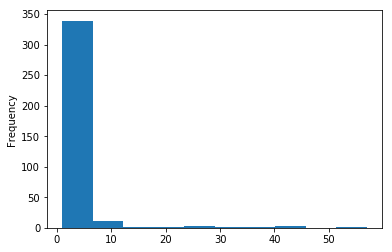

In [6]:
#少しだけ出現する単語が非常に多い
neko_df['surface'].value_counts().plot.hist()

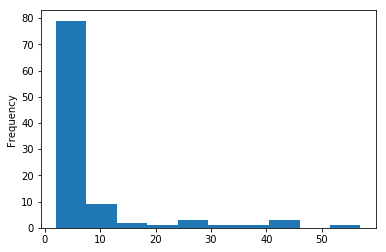

In [5]:
#100件くらいに絞ると見やすい
neko_df['surface'].value_counts().head(100).plot.hist()